In [223]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [224]:
from sklearn.svm import SVC
from sklearn import datasets

#define a function to create a toy dataset (credit: sklearn & Yi Du)
def create_linear_SVM_toy_data(n_samples_per_class=50, n_features=2, n_classes=2, random_state=4742023):
    # Using make_blobs to generate clusters of data
    X, y = datasets.make_blobs(n_samples=n_samples_per_class * n_classes,
                      n_features=n_features, 
                      centers=n_classes, 
                      cluster_std=0.5, 
                      center_box=(0, 10),
                      random_state=random_state)
    return X, y

X, y = create_linear_SVM_toy_data()

# SVM Classifier model
#the hyperparameter control the margin violations
#smaller C leads to more margin violations but wider street
#C can be inferred
#C, default=1.0
#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
#Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

#degreeint, default=3
#Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

svm_clf.predict([[2.4, 3.1]])

#SVM classifiers do not output a probability like logistic regression classifiers

array([1])

In [225]:
np.max(X[:,0])
X.shape

(100, 2)

(-2.0, 2.0, -2.0, 2.0)

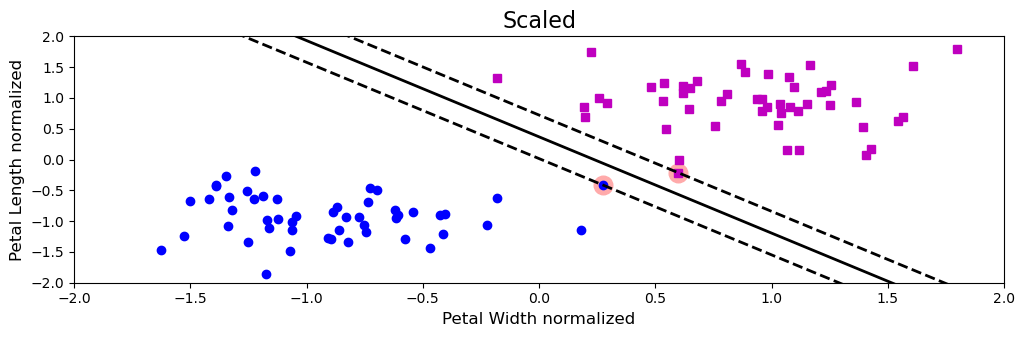

In [226]:
#plot the decision boundaries
import numpy as np

plt.figure(figsize=(12,3.2))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])